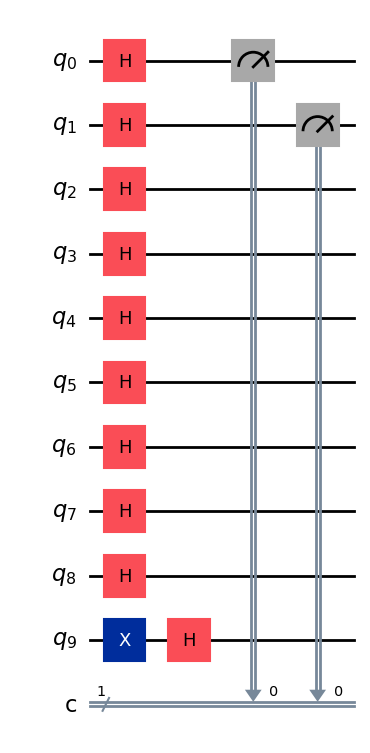

In [64]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
n = 10
qc = QuantumCircuit(n,1)
qc.x(n-1)
qc.h(range(n))
qc.measure(0,0)
qc.measure(1,0)
result = AerSimulator().run(qc, shots=1, memory=True).result()
measurements = result.get_memory()
qc.draw('mpl')

In [72]:
from qiskit.quantum_info import Pauli
p = Pauli('IZ')
print(p.to_matrix()) 

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


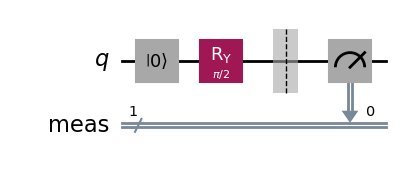

In [92]:
from qiskit import QuantumCircuit 
import numpy as np 
qc = QuantumCircuit(1) 
qc.reset(0) 
qc.ry(np.pi / 2, 0) 
qc.measure_all() 
result = AerSimulator().run(qc, shots=100, memory=True).result()
measurements = result.get_memory()
qc.draw('mpl')

In [ ]:
from qiskit.quantum_info import Statevector 
from qiskit.visualization import plot_histogram 
state = Statevector([0.+0.j, 0.+0.j, 0.70710678+0.j, 0.+0.j, 0.+0.j, -0.70710678+0.j, 0.+0.j, 0.+0.j]) 
counts = state.sample_counts(shots=1024) 
plot_histogram(counts) 

from qiskit.visualization import array_to_latex
display(array_to_latex(state))
display(state.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

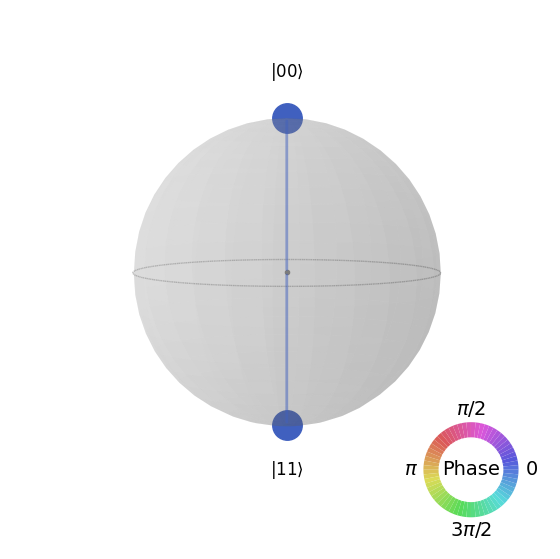

In [112]:
from qiskit.visualization import plot_state_qsphere

qc = QuantumCircuit(2) 
qc.h(0) 
#qc.z(0) 
qc.cx(0, 1) 
state = Statevector(qc) 
plot_state_qsphere(state) 

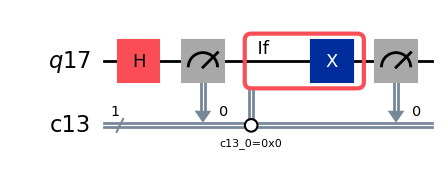

In [183]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 0)):
    circuit.x(q0)
circuit.measure(q0, c0)
circuit.draw("mpl")
 
# example output counts: {'0': 1024}

# IMPORTANT

API: TeDs6mRVghIvO5zI6njfU1dGA-jAon4_vPY1psb_44ja

Trial1 CRN: crn:v1:bluemix:public:quantum-computing:us-east:a/fdacda90a9c84a92939a68923076c59c:557d5ab9-ae89-4f9c-8443-548815db1b47::

In [ ]:
########################
# NEED TO SAVE ACCOUNT #
########################

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService.save_account(

    token="TeDs6mRVghIvO5zI6njfU1dGA-jAon4_vPY1psb_44ja", # IBM Cloud API key.
    # Your token is confidential. Do not share your token in public code.

    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/fdacda90a9c84a92939a68923076c59c:557d5ab9-ae89-4f9c-8443-548815db1b47::", # Optionally specify the instance to use.

    # Additionally, instances of a certain plan type are excluded if the plan name is not specified.
    #region="us-east", # Optionally set the region to prioritize. Accepted values are 'us-east' or 'eu-de'. This is ignored if the instance is specified.
    #name="<account-name>", # Optionally name this set of account credentials. 
    #set_as_default=True, # Optionally set these as your default credentials.
)

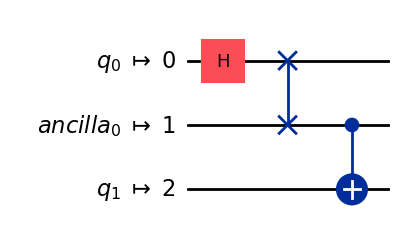

In [13]:
from qiskit import QuantumCircuit 
from qiskit import generate_preset_pass_manager 
qc = QuantumCircuit(2) 
qc.h(0) 
qc.cx(0,1) 
pass_manager = generate_preset_pass_manager( optimization_level=3, coupling_map=[[0, 1], [1, 2]] , basis_gates=['h', 'swap', 'cx'], initial_layout=[0, 2] ) 
tqc = pass_manager.run(qc) 
tqc.draw(output="mpl")  

In [ ]:

# Generate preset pass manager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
backend.name

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)

circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

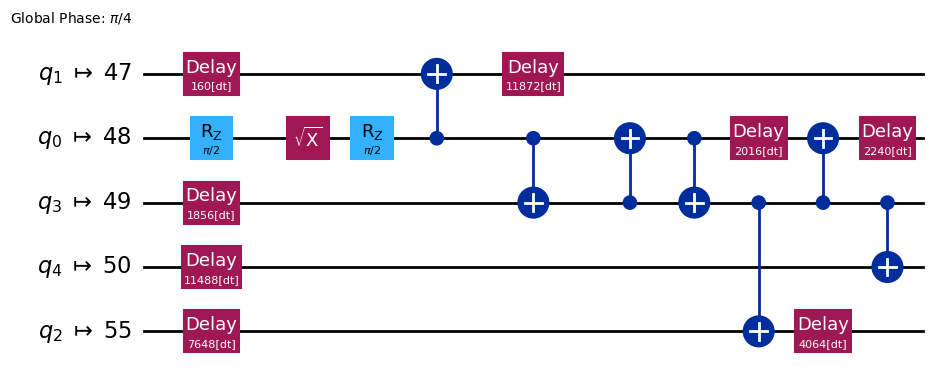

In [218]:
from qiskit_ibm_runtime.fake_provider import FakeWashingtonV2

ghz = QuantumCircuit(5)
ghz.h(0)
ghz.cx(0, range(1, 5))
 
# Use fake backend
backend = FakeWashingtonV2()
 
# Run with optimization level 3 and 'asap' scheduling pass
pass_manager = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    scheduling_method="asap",
    seed_transpiler=1234,
)
 
 
circ = pass_manager.run(ghz)
circ.draw(output="mpl", idle_wires=False)

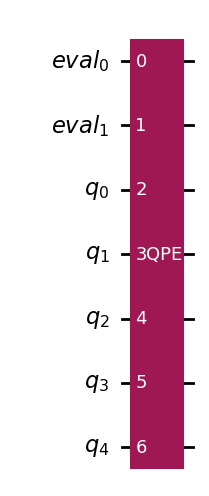

In [236]:
from qiskit.circuit.library import FourierChecking, PhaseEstimation

PhaseEstimation(2, ghz).draw("mpl")

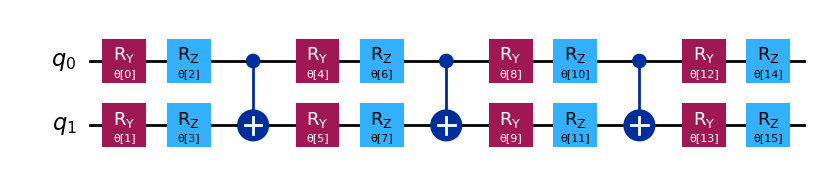

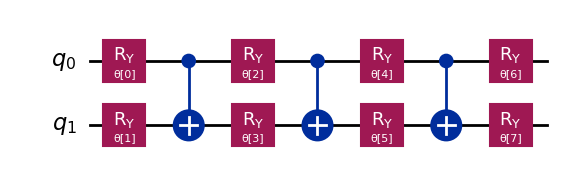

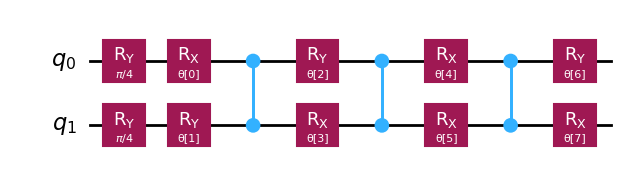

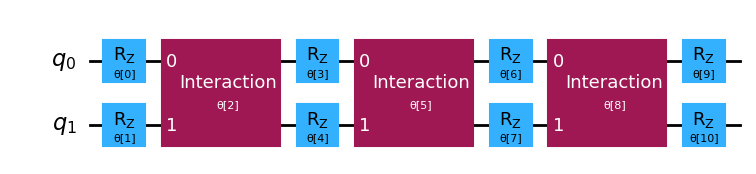

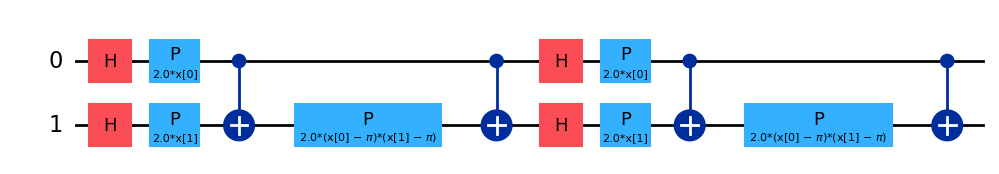

In [253]:
from qiskit.circuit.library import n_local, efficient_su2, real_amplitudes, pauli_two_design, excitation_preserving, qaoa_ansatz, hamiltonian_variational_ansatz, evolved_operator_ansatz, zz_feature_map

circuit = efficient_su2(2)
display(circuit.draw("mpl"))

circuit2 = real_amplitudes(2)
display(circuit2.draw("mpl"))   

circuit3 = pauli_two_design(2)
display(circuit3.draw("mpl"))

circuit4 = excitation_preserving(2)
display(circuit4.draw("mpl"))  

circuit8 = zz_feature_map(2)
display(circuit8.draw("mpl"))

In [ ]:
from qiskit.quantum_info import random_hermitian
from qiskit.circuit.library import IQP

n_qubits = 127
 
mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
circuit.measure_all()

In [258]:
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

In [267]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session
 
n_qubits = 1
 
rng = np.random.default_rng(1234)
mat = np.real(random_hermitian(n_qubits, seed=rng))
circuit = IQP(mat)
circuit.measure_all()
mat = np.real(random_hermitian(n_qubits, seed=rng))
another_circuit = IQP(mat)
another_circuit.measure_all()
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
another_isa_circuit = pm.run(another_circuit)

# Providers

In [2]:
from qiskit.providers.providerutils import filter_backends
from .backend import MyBackend

class MyProvider:

    def __init__(self, token=None):
        super().__init__()
        self.token = token
        self.backends = [MyBackend(provider=self)]

    def backends(self, name=None, **kwargs):
        if name:
            backends = [
                backend for backend in backends if backend.name() == name]
        return filter_backends(backends, filters=filters, **kwargs)

ImportError: attempted relative import with no known parent package

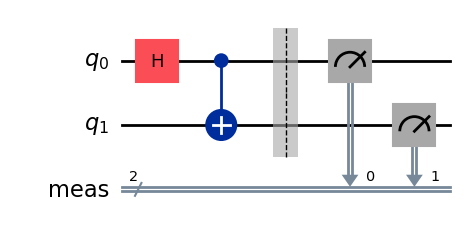

In [12]:
qc.draw('mpl')

In [40]:
from qiskit.qasm3 import dump, dumps
import io

from qiskit import QuantumCircuit 
qc = QuantumCircuit(2) 
qc.h(0) 
qc.cx(0,1) 


stream = io.StringIO()
dump(qc, stream)
qasm3_code = stream.getvalue()
print(qasm3_code)

print(dumps(qc))

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
h q[0];
cx q[0], q[1];

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
h q[0];
cx q[0], q[1];



In [1]:
from qiskit.qasm3 import Exporter, ExperimentalFeatures
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

exporter = Exporter(experimental=ExperimentalFeatures.SWITCH_CASE_V1)

qasm3_code = exporter.dumps(qc)
print(qasm3_code)

#with open("example.qasm3", "w") as f:
#    exporter.dump(qc, f)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];



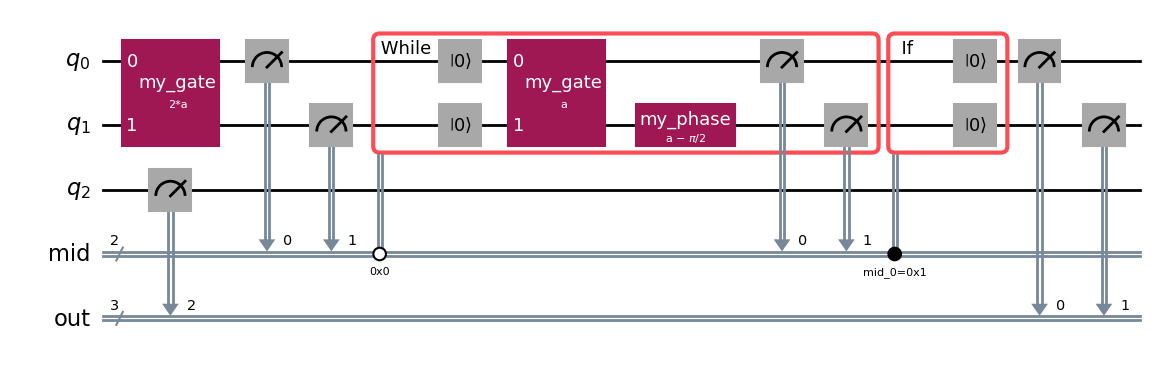

In [2]:
import qiskit.qasm3
 
program = """
    OPENQASM 3.0;
    include "stdgates.inc";
 
    input float[64] a;
    qubit[3] q;
    bit[2] mid;
    bit[3] out;
 
    let aliased = q[0:1];
 
    gate my_gate(a) c, t {
      gphase(a / 2);
      ry(a) c;
      cx c, t;
    }
    gate my_phase(a) c {
      ctrl @ inv @ gphase(a) c;
    }
 
    my_gate(a * 2) aliased[0], q[{1, 2}][0];
    measure q[0] -> mid[0];
    measure q[1] -> mid[1];
 
    while (mid == "00") {
      reset q[0];
      reset q[1];
      my_gate(a) q[0], q[1];
      my_phase(a - pi/2) q[1];
      mid[0] = measure q[0];
      mid[1] = measure q[1];
    }
 
    if (mid[0]) {
      let inner_alias = q[{0, 1}];
      reset inner_alias;
    }
 
    out = measure q;
"""
circuit = qiskit.qasm3.loads(program)
circuit.draw("mpl")

In [13]:
import requests
import json
 
reqUrl = "https://quantum.cloud.ibm.com/api/v1/jobs"
 
headersList = {
  "Accept": "application/json",
  "Authorization": "Bearer <TeDs6mRVghIvO5zI6njfU1dGA-jAon4_vPY1psb_44ja>",
  "Service-CRN": "<crn:v1:bluemix:public:quantum-computing:us-east:a/fdacda90a9c84a92939a68923076c59c:557d5ab9-ae89-4f9c-8443-548815db1b47::>"
  "Content-Type": "application/json"
}
 
payload = json.dumps({
  "program_id": "estimator",
  "backend": "ibm_brisbane",
  "params": {
    "pubs": [[
      "OPENQASM 3.0; include \"stdgates.inc\"; bit[1] c; x $0; c[0] = measure $0;", "Z"
    ]],
    "options": {"dynamical_decoupling": {"enable": True}},
    "version": 2,
    "resilience_level": 1
  }
})
 
response = requests.request("POST", reqUrl, data=payload,  headers=headersList)
 
print(response.json())

SyntaxError: invalid syntax (1348865745.py, line 10)

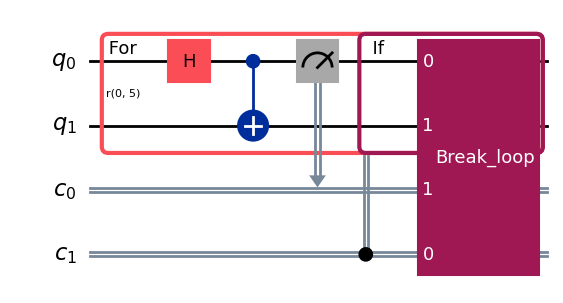

In [48]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 2)
 
with qc.for_loop(range(5)) as i:
    qc.h(0)
    qc.cx(0, 1)
    qc.measure(0, 0)
    with qc.if_test((1, True)):
        qc.break_loop()
qc.draw('mpl')

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])
9
19
12


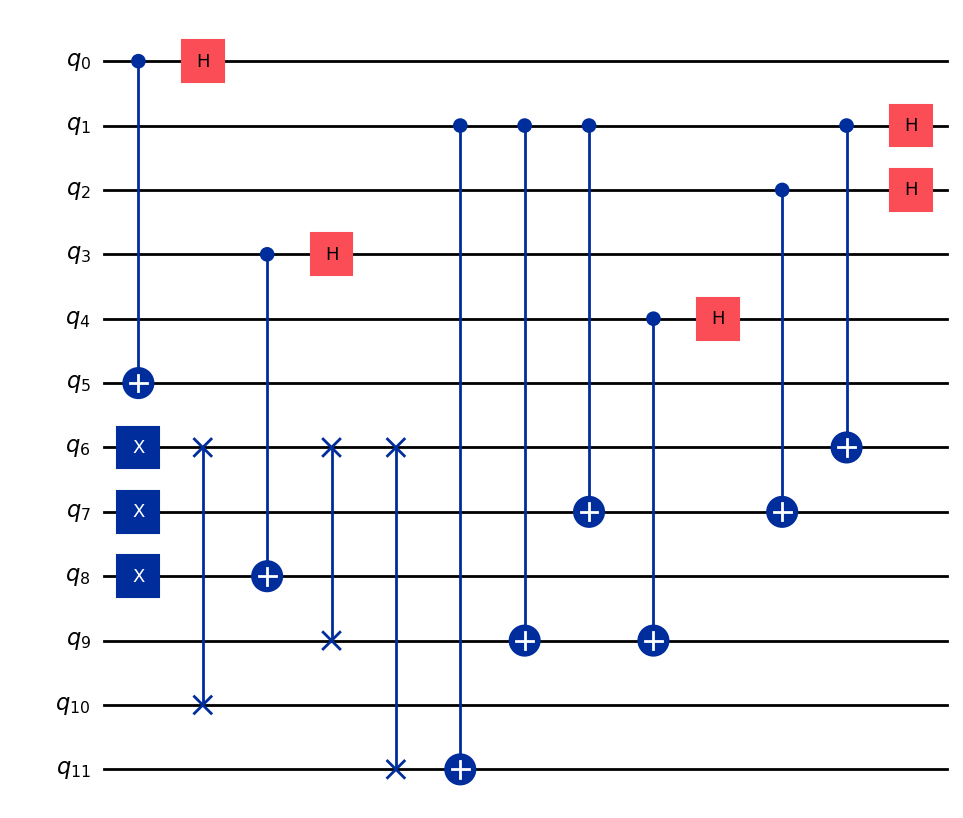

In [94]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(12)
for idx in range(5):
   qc.h(idx)
   qc.cx(idx, idx+5)
 
qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)

print(qc.count_ops())
print(qc.depth())
print(qc.size())
print(qc.width())
qc.draw('mpl')
qc.inverse().draw('mpl')

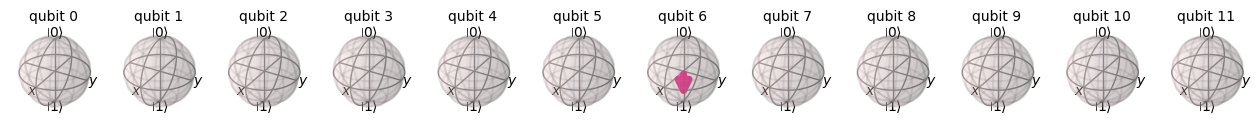

In [99]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(Statevector(qc))

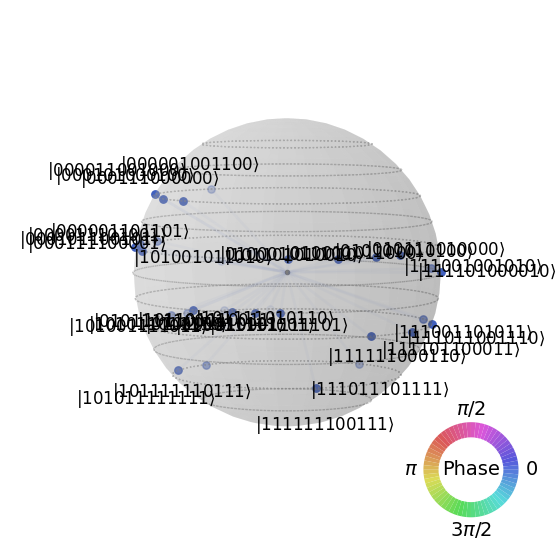

In [ ]:
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix)

# Visualizations

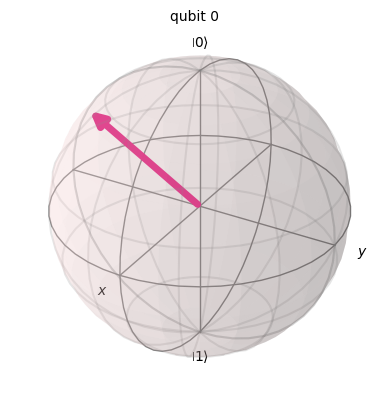

In [76]:
state = [[ 0.75  , 0.433j],
         [-0.433j, 0.25  ]]

from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_hinton, plot_state_paulivec, plot_state_qsphere

plot_bloch_multivector(state)

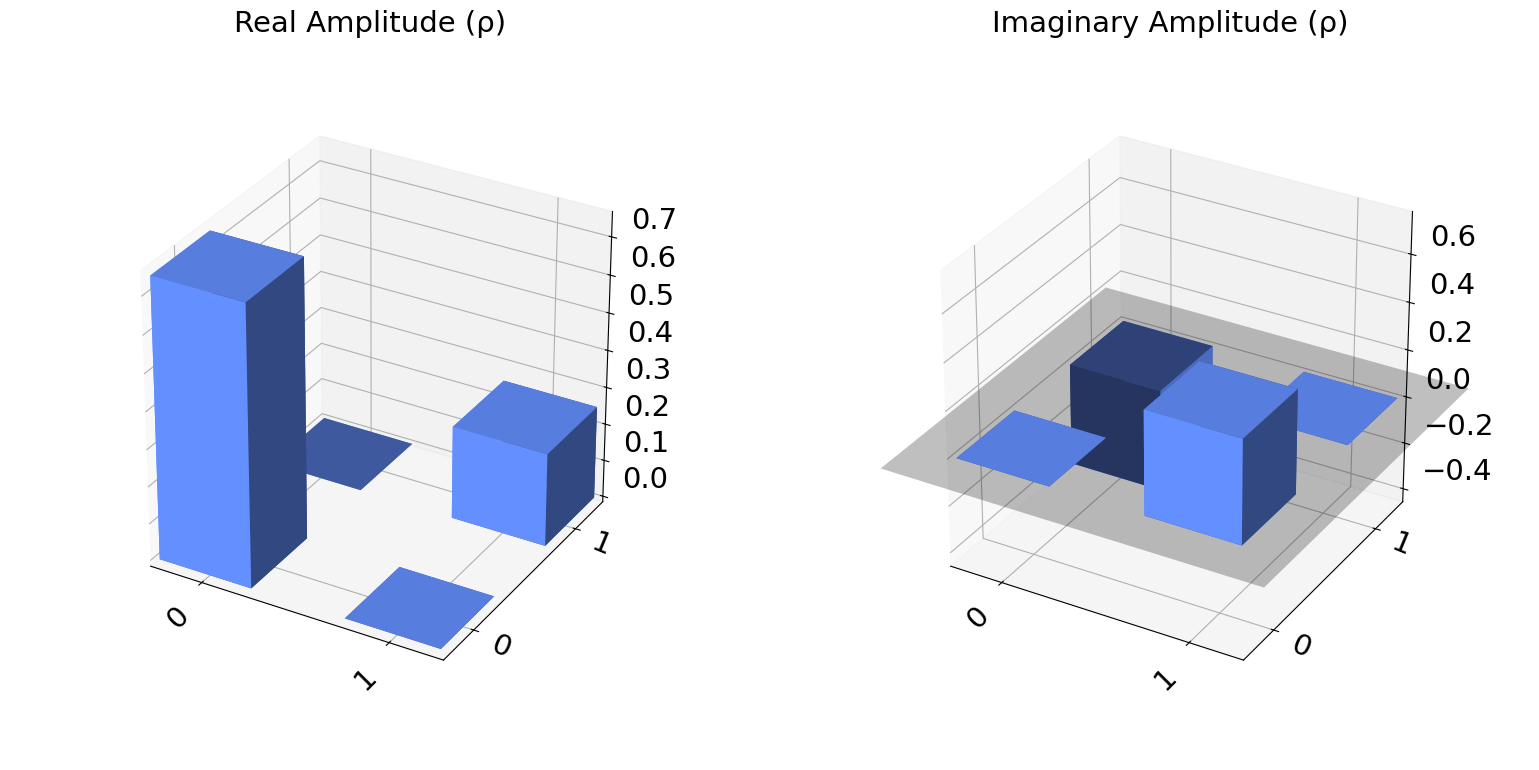

In [73]:
plot_state_city(state)

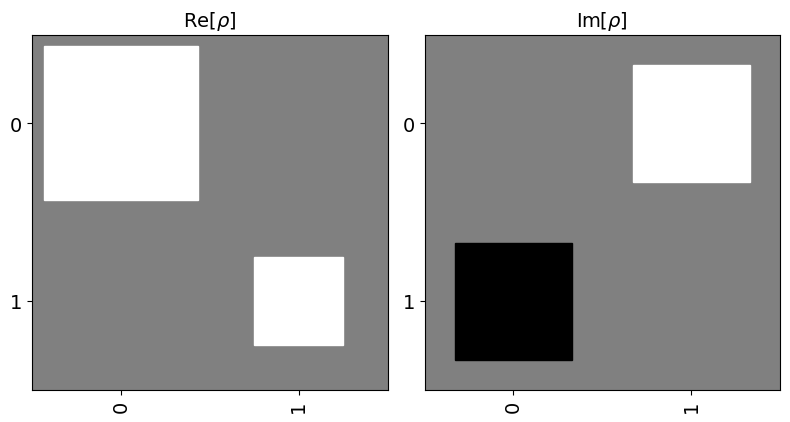

In [77]:
plot_state_hinton(state)

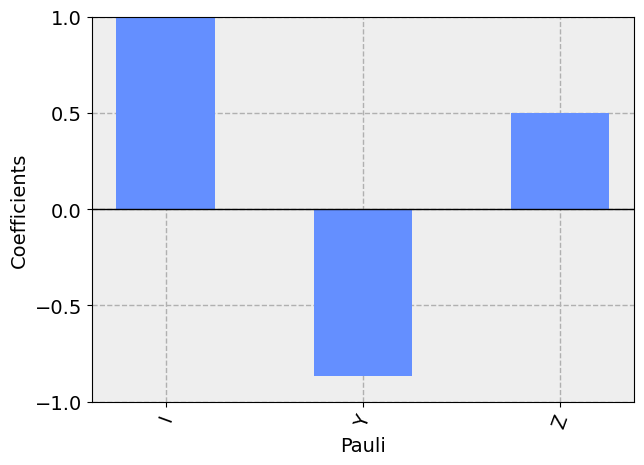

In [84]:
plot_state_paulivec(state) 

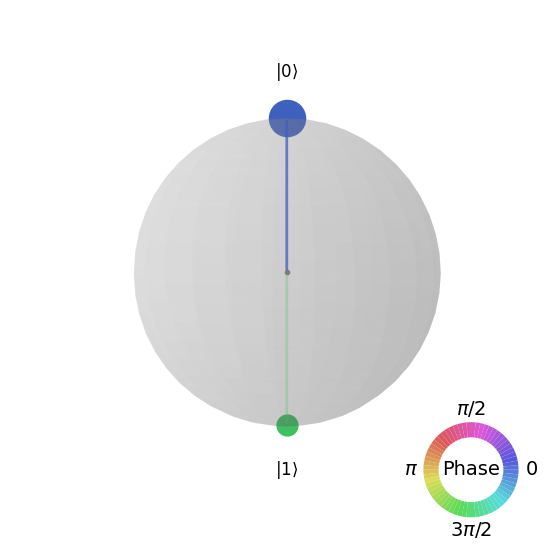

In [78]:
plot_state_qsphere(state)

In [32]:
from qiskit.primitives import StatevectorEstimator
from qiskit.circuit import QuantumCircuit, Parameter
import numpy as np

qc = QuantumCircuit(5,1, metadata={"name": "Example Circuit"})
qc.h(0)
qc.cx(0,1)
qc.rz(Parameter("theta"), 2)
qc.ry(Parameter("phi"), 0)
qc.h(3)
qc.cx(3,4)
qc.t(4)
qc.ccx(1,2,4)


estimator = StatevectorEstimator()
from qiskit.quantum_info import SparsePauliOp, Pauli
observables = [[SparsePauliOp("XXXXX")], [SparsePauliOp("ZZZZZ")]]
params = np.vstack([
    np.linspace(-np.pi, np.pi, 1),
    np.linspace(-np.pi, np.pi, 1)
    ]).T

pub = (qc, observables, params)
job = estimator.run([pub])

result = job.result()
print(result)
print(result[0].data.stds)
print(result[0].data.evs)

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(2, 1), dtype=float64>), stds=np.ndarray(<shape=(2, 1), dtype=float64>), shape=(2, 1)), metadata={'target_precision': 0.0, 'circuit_metadata': {'name': 'Example Circuit'}})], metadata={'version': 2})
[[0.]
 [0.]]
[[ 0.]
 [-1.]]


DataBin(c=BitArray(<shape=(1,), num_shots=1024, num_bits=1>), meas=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas0=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas1=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas2=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas3=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas4=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas5=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas6=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas7=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas8=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas9=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas10=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas11=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas12=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas13=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas14=BitArray(<shape=(1,), num_shots=1024, num_bits=5>), meas15

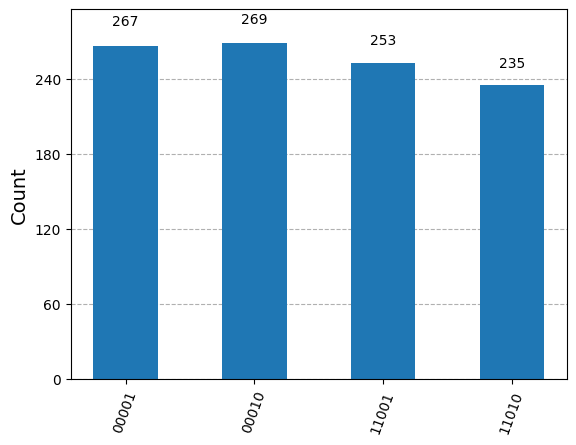

In [84]:
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

qc.measure_all()
sampler = StatevectorSampler()
pub = (qc, params)
job = sampler.run([pub])

result = job.result()

print(result[0].data)
print(result[0].data.meas)
print(f"The shape is: {result[0].data.meas.array.shape}")
print(f"The bytes in regiter, shot by shot: {result[0].data.meas.array}")
print(result[0].data.meas.get_counts())
plot_histogram(result[0].data.meas.get_counts())

# Estimator Example

In [161]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=127
)
 
print(backend.name)

ibm_torino


In [179]:
from qiskit.circuit.library import qaoa_ansatz
from qiskit.quantum_info import SparsePauliOp
 
entanglement = [tuple(edge) for edge in backend.coupling_map.get_edges()]
observable = SparsePauliOp.from_sparse_list(
    [("ZZ", [i, j], 0.5) for i, j in entanglement],
    num_qubits=backend.num_qubits,
)
circuit = qaoa_ansatz(observable, reps=1)
# the circuit is parametrized, so we will define the parameter values for execution
param_values = [0.1, 0.2, 0.3, 0.4]
 
print(f">>> Observable: {observable.paulis}")


>>> Observable: ['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...', ...]


In [167]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(mode=backend)

# Broadcating

In [ ]:
# Broadcast single observable
parameter_values = np.random.uniform(size=(5,))  # shape (5,)
observables = SparsePauliOp("ZZZ")  # shape ()
# >> pub result has shape (5,)
 
# Zip
parameter_values = np.random.uniform(size=(5,))  # shape (5,)
observables = [
    SparsePauliOp(pauli) for pauli in ["III", "XXX", "YYY", "ZZZ", "XYZ"]
]  # shape (5,)
# >> pub result has shape (5,)
 
# Outer/Product
parameter_values = np.random.uniform(size=(1, 6))  # shape (1, 6)
observables = [
    [SparsePauliOp(pauli)] for pauli in ["III", "XXX", "YYY", "ZZZ"]
]  # shape (4, 1)
# >> pub result has shape (4, 6)
 
# Standard nd generalization
parameter_values = np.random.uniform(size=(3, 6))  # shape (3, 6)
observables = [
    [
        [SparsePauliOp(["XII"])],
        [SparsePauliOp(["IXI"])],
        [SparsePauliOp(["IIX"])],
    ],
    [
        [SparsePauliOp(["ZII"])],
        [SparsePauliOp(["IZI"])],
        [SparsePauliOp(["IIZ"])],
    ],
]
# >> pub result has shape (2, 3, 1)

# Sampler outcomes

C:\Users\Mikel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\qpy\interface.py:333: UserWarning: The qiskit version used to generate the provided QPY file, 2.1.2, is newer than the current qiskit version 1.3.2. This may result in an error if the QPY file uses instructions not present in this current qiskit version
  warnings.warn(


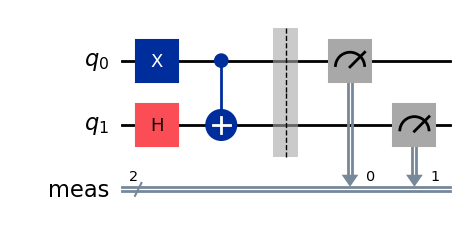

In [102]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.noise_learner import NoiseLearner
from qiskit.transpiler import generate_preset_pass_manager

qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.cx(0, 1)
qc.measure_all()

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=2)

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
circuit_to_learn = pm.run(qc)

learner = NoiseLearner(mode=backend)
job = learner.run([circuit_to_learn])
noise_model = job.result()

qc.draw('mpl')

In [ ]:
print(noise_model.data[0].error)

# To use it afterwards in a primitive

from qiskit_ibm_runtime import EstimatorV2
from qiskit_ibm_runtime import EstimatorOptions
import ResilienceOptionsV2

# pass the noise model to the `estimator.options` attribute directly
estimator = EstimatorV2(mode=backend)
estimator.options.resilience.layer_noise_model = noise_model

# Specify options via a ResilienceOptionsV2 object
resilience_options = ResilienceOptionsV2(layer_noise_model=noise_model)
estimator_options = EstimatorOptions(resilience=resilience_options)
estimator = EstimatorV2(mode=backend, options=estimator_options)

PauliLindbladError(generators=['IX', 'IY', 'IZ', 'XI', 'XX', 'XY', 'XZ', 'YI', 'YX', 'YY', 'YZ', 'ZI',
 'ZX', 'ZY', 'ZZ'], rates=[0.00023, 0.00023, 0.00033, 0.00036, 3e-05, 7e-05, 0.00036, 0.00033, 7e-05, 3e-05, 0.00033, 0.00025, 0.00023, 0.00023, 9e-05])


In [125]:
job.error_message()

[0.14644661 0.85355339]


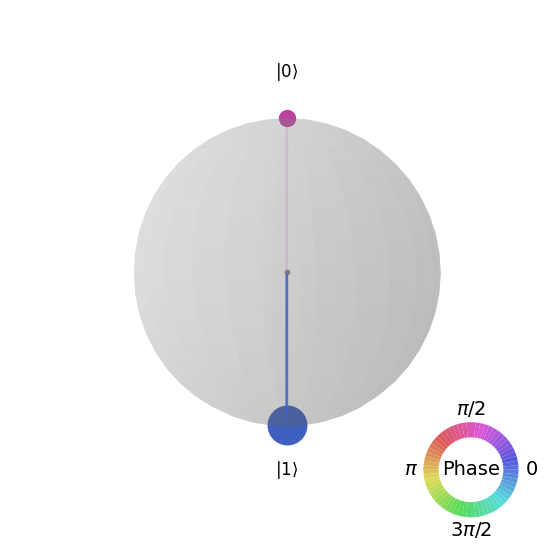

In [192]:
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(1)
qc.rx(3*np.pi/4,0)
state = Statevector(qc)

print(state.probabilities())
plot_state_qsphere(qc)

In [198]:
service = QiskitRuntimeService()
backend = service.backend('ibm_torino')
print(backend.name)

ibm_torino
